# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID : 5816971

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, accuracy_score, recall_score
from scipy.spatial import distance


# check stationary or not
from statsmodels.tsa.stattools import adfuller
# plot PACF nad ACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm



## 1. Familiarization task – 1 A4

### 1a. Plot visualizations

In [2]:
# read data
train_df = pd.read_csv("train_data.csv")
train_df

# check if attacked in train_data
if 1 in train_df['Label'].values:
    print("outlier detection")
else:
    print("novelty detection")

# Check the information of the training data
train_df.info()

# Check the statistics of the training data
train_df.describe()


novelty detection
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 54 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id         496800 non-null  int64  
 1   Timestamp  496800 non-null  object 
 2   FIT101     496800 non-null  float64
 3   LIT101     496800 non-null  float64
 4   MV101      496800 non-null  int64  
 5   P101       496800 non-null  int64  
 6   P102       496800 non-null  int64  
 7   AIT201     496800 non-null  float64
 8   AIT202     496800 non-null  float64
 9   AIT203     496800 non-null  float64
 10  FIT201     496800 non-null  float64
 11  MV201      496800 non-null  int64  
 12  P201       496800 non-null  int64  
 13  P202       496800 non-null  int64  
 14  P203       496800 non-null  int64  
 15  P204       496800 non-null  int64  
 16  P205       496800 non-null  int64  
 17  P206       496800 non-null  int64  
 18  DPIT301    496800 non-null  float64
 19  FIT30

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


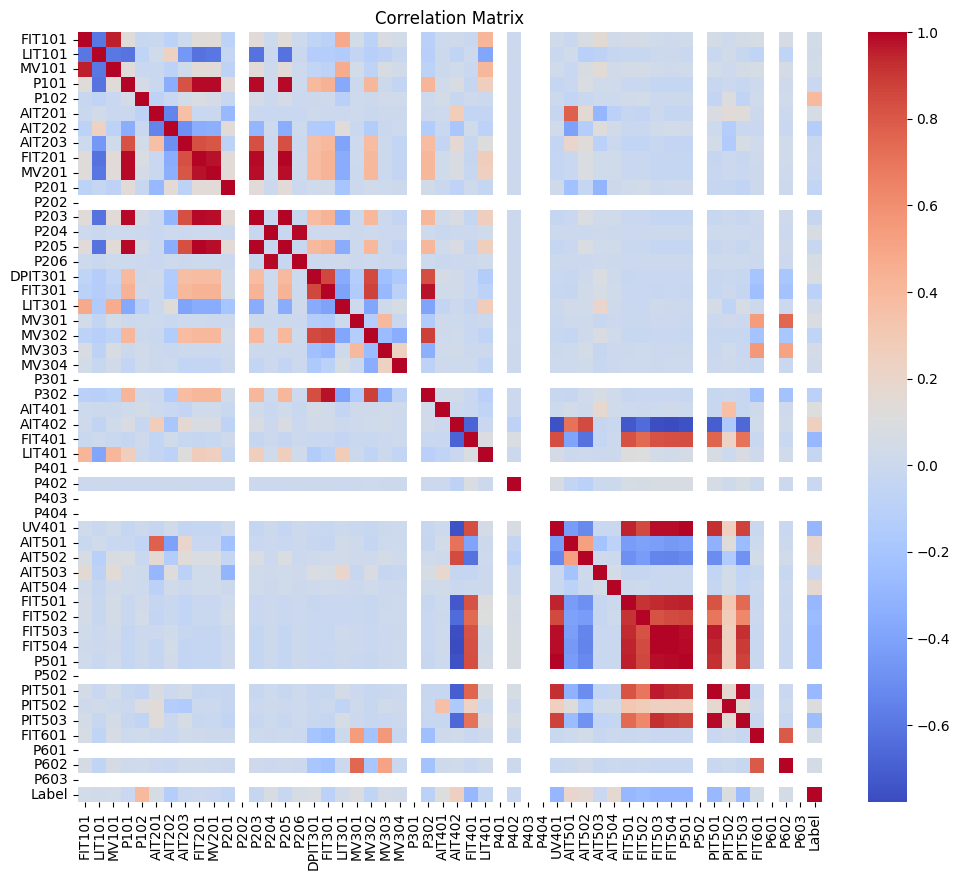

In [25]:
# visualize the data

# Compute correlation matrix using training data
# correlation_matrix = train_df.iloc[:, 2:-1].corr()

# Compute correlation matrix using val data
val_df = pd.read_csv("val_data.csv")
correlation_matrix = val_df .iloc[:, 2:].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
# Compute correlation matrix
# correlation_matrix = train_df.iloc[:, 2:].corr()
correlation_matrix = val_df.iloc[:, 2:].corr()

# Set a threshold for correlation values (adjust as needed)
threshold = 0.4  # You can change this value to suit your needs

# Find highly positively correlated pairs
highly_pos_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            highly_pos_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Find highly negatively correlated pairs
highly_neg_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -threshold:
            highly_neg_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Remove repeated pairs
unique_pos_correlated_pairs = list(set(highly_pos_correlated_pairs))
unique_neg_correlated_pairs = list(set(highly_neg_correlated_pairs))

# Print the highly positively correlated pairs
print("Highly Positively Correlated Pairs:")
for pair in unique_pos_correlated_pairs:
    print(pair)

# Print the highly negatively correlated pairs
print("Highly Negatively Correlated Pairs:")
for pair in unique_neg_correlated_pairs:
    print(pair)


Highly Positively Correlated Pairs:
('AIT203', 'FIT201')
('FIT201', 'P302')
('AIT402', 'AIT501')
('FIT401', 'PIT503')
('FIT301', 'P302')
('MV303', 'P602')
('FIT401', 'FIT501')
('FIT503', 'FIT504')
('P101', 'MV201')
('MV201', 'P205')
('P203', 'FIT301')
('AIT203', 'P205')
('FIT501', 'FIT504')
('P101', 'FIT201')
('FIT501', 'FIT503')
('FIT504', 'P501')
('MV303', 'FIT601')
('FIT501', 'P501')
('P501', 'PIT503')
('AIT203', 'FIT301')
('MV201', 'MV302')
('P204', 'P206')
('P501', 'PIT501')
('DPIT301', 'FIT301')
('MV201', 'P203')
('DPIT301', 'MV302')
('FIT201', 'MV201')
('P101', 'P205')
('FIT401', 'PIT501')
('FIT503', 'PIT503')
('AIT203', 'P203')
('MV301', 'P602')
('AIT501', 'AIT502')
('P101', 'FIT301')
('FIT301', 'MV302')
('FIT502', 'FIT504')
('FIT502', 'FIT503')
('P205', 'MV302')
('MV101', 'LIT401')
('FIT502', 'P501')
('P101', 'MV302')
('UV401', 'PIT503')
('MV201', 'FIT301')
('FIT501', 'FIT502')
('AIT201', 'AIT501')
('UV401', 'FIT501')
('UV401', 'PIT501')
('P101', 'P203')
('MV301', 'FIT601')
('

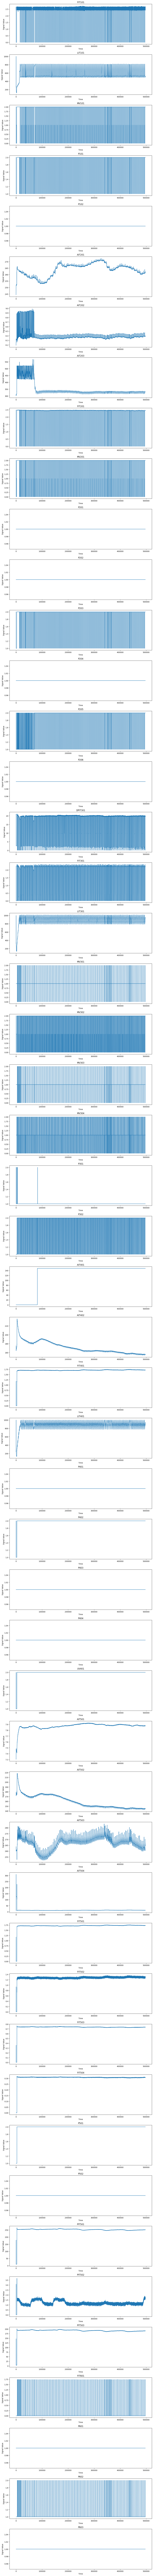

In [5]:
# plot every signal
subset_signals = train_df.iloc[:, 2:-1]
fig, axes = plt.subplots(len(subset_signals.columns), 1, figsize=(12, 200))

for i, column in enumerate(subset_signals.columns):
    subset_signals[column].plot(ax=axes[i])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Value')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


### 1b. Answers to the three questions

1. Signal Types:
- Discrete fluctuating signal: The signal fluctuates between two or three values with some variance.
- Constant signal: The signal remains steady(back up actuator).
- Non-periodic signal: The signal changes over time without a noticeable periodic pattern.

2. Signal correlation: From the correlation matrix, we can observe that there are many highly positively or negatively relations between the signals.

3. Cyclic behavior: The discrete fluctuating signal and constant signal exhibit cyclic behavior, as they repeat certain patterns over time. However, the non-periodic evolving signal does not demonstrate an obvious periodic pattern.



## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

Apply normalization to the whole dataframe first, and then detect and remove anormalities

the number of abnormalies when using 1 components is 14412
top 1 components can explain 0.48984525298015685 of the variance
the number of abnormalies when using 2 components is 13029
top 2 components can explain 0.6642827889899601 of the variance
the number of abnormalies when using 3 components is 26855
top 3 components can explain 0.7884064764942931 of the variance
the number of abnormalies when using 4 components is 22826
top 4 components can explain 0.8609851049280648 of the variance
the number of abnormalies when using 5 components is 12857
top 5 components can explain 0.8986291563103442 of the variance
the number of abnormalies when using 6 components is 11044
top 6 components can explain 0.928912785797192 of the variance
the number of abnormalies when using 7 components is 10605
top 7 components can explain 0.9436592938758814 of the variance
the number of abnormalies when using 8 components is 8767
top 8 components can explain 0.9546976387494012 of the variance


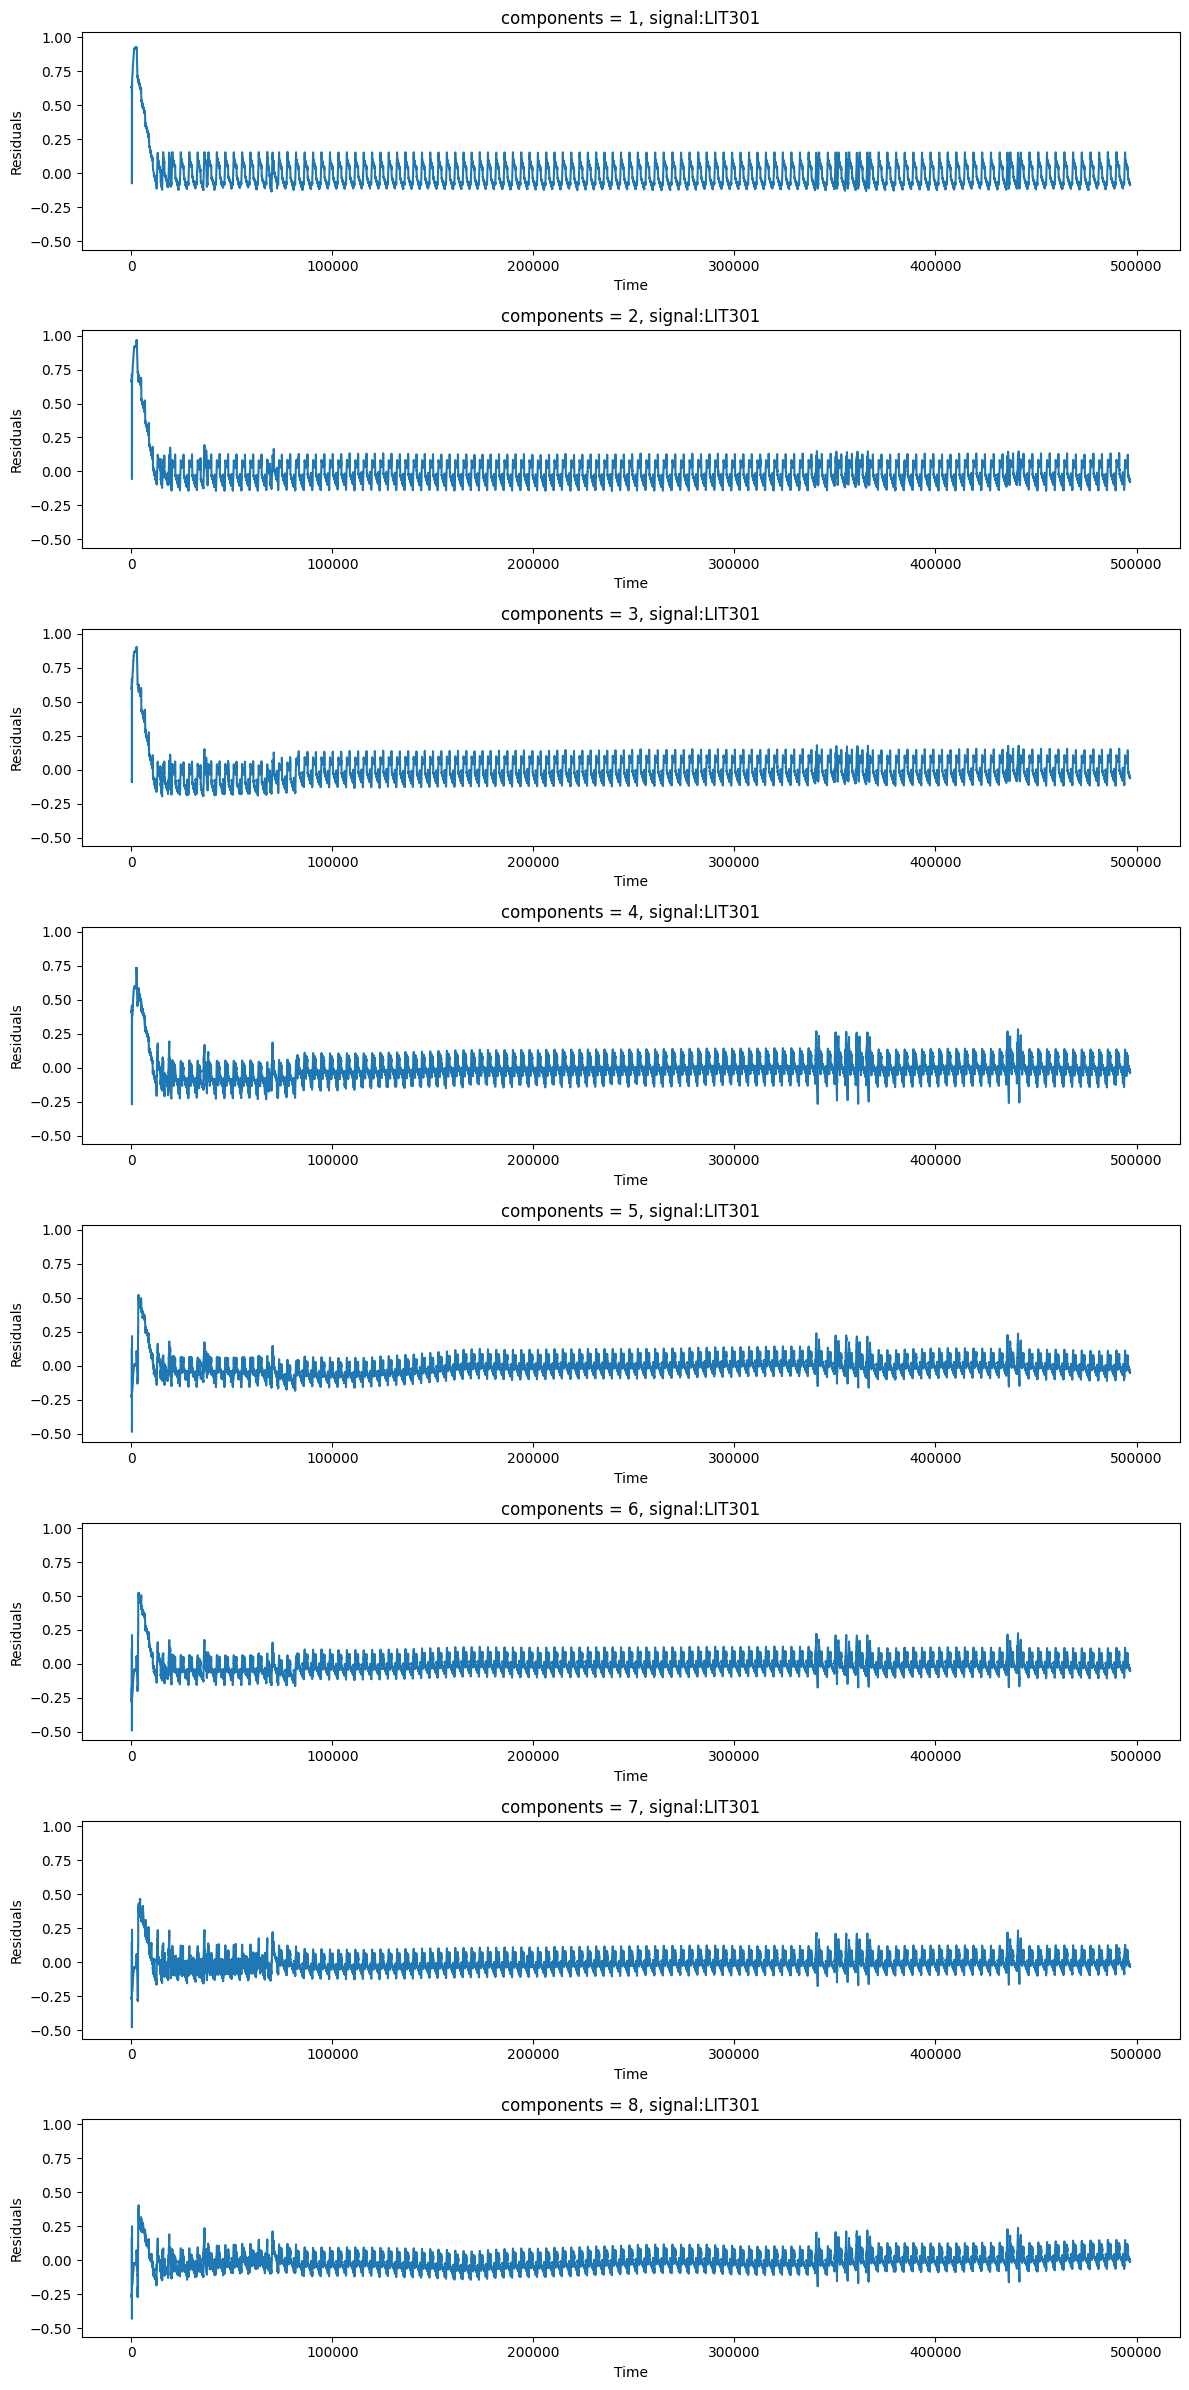

In [32]:
# Normalize the DataFrame
train_features = train_df.drop(['Label','Id','Timestamp'], axis = 1)
scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(train_features)
normalized_train = pd.DataFrame(normalized_train, columns=train_features.columns)

# select a signal and the threshold for resiudals
signal = 'LIT301'
threshold = 0.135

# choose the best number of components
num_components = [1,2,3,4,5,6,7,8]

fig, axes = plt.subplots(len(num_components), 1, figsize=(12, 24), sharey=True)

for i, num in enumerate(num_components):
    pca = PCA(n_components=num, random_state=2)
    df_pca = pd.DataFrame(pca.fit_transform(normalized_train), index=train_features.index)
    df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index, columns=train_features.columns)

#     univariate data points
    residuals = df_restored[signal] - normalized_train[signal]
#     multivariate data points
#     residuals = np.sqrt(np.sum((df_restored - normalized_df)**2, axis=1))

    axes[i].plot(range(len(residuals)), residuals)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title("components = {}, signal:{}".format(num,signal))
    
    count = len(residuals[abs(residuals) >= threshold])
    print("the number of abnormalies when using {} components is {}".format(num,count))
    print("top {} components can explain {} of the variance".format(len(pca.explained_variance_ratio_),sum(pca.explained_variance_ratio_)))

plt.tight_layout()
plt.show()

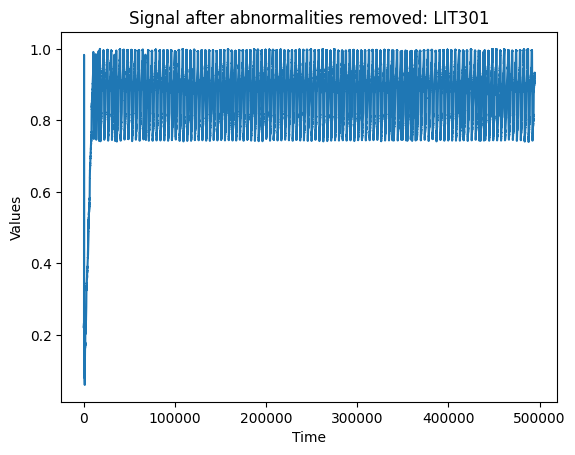

In [43]:
# Detect and remove anormalies for training data

num = 4
pca = PCA(n_components=num, random_state=2)
df_pca = pd.DataFrame(pca.fit_transform(normalized_train), index=normalized_train.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index, columns=normalized_train.columns)

residuals = df_restored[signal] - normalized_train[signal]

abnormal_index = residuals[abs(residuals) > threshold].index

abnormal_removed = normalized_train.loc[~normalized_train.index.isin(abnormal_index)]

plt.plot(range(len(abnormal_removed[signal])), abnormal_removed[signal].values)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("Signal after abnormalities removed: {}".format(signal))

plt.show()

In [ ]:
Now re-train the PCA model without abnormalities and validate

top 4 components can explain 0.877154333379341 of the variance
we have 11036 abnormalities in val dataset


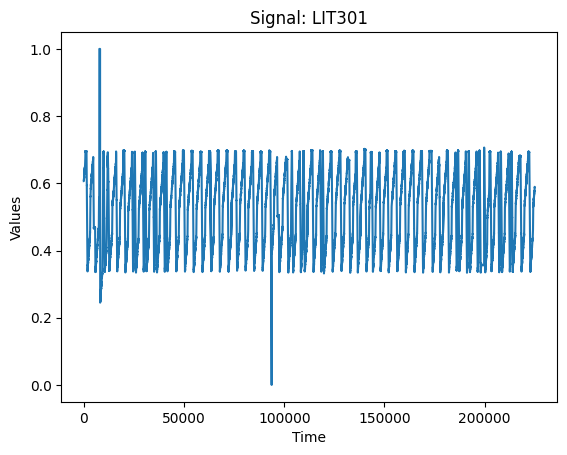

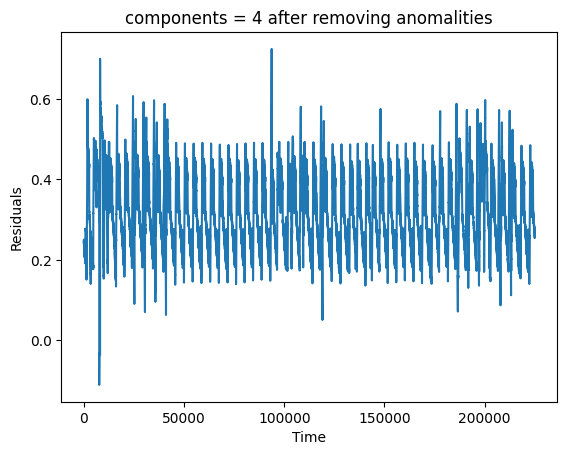

the number of predicted abnormalies when using 4 components is 1622
Accuracy: 0.9457056619206167
Recall: 0.020115984052192823
F1 score: 0.03507663137936483


In [44]:
# re-train the pca model
num = 4
pca = PCA(n_components=num, random_state=2)
df_pca = pd.DataFrame(pca.fit_transform(abnormal_removed), index=abnormal_removed.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index, columns=abnormal_removed.columns)
print("top {} components can explain {} of the variance".format(len(pca.explained_variance_ratio_),sum(pca.explained_variance_ratio_)))

# read val data and normalize nad plot
val_data = pd.read_csv("val_data.csv")
labels = val_data['Label']
print("we have {} abnormalities in val dataset".format(len(labels[labels==1])))
val_data = val_data.drop(['Label','Id','Timestamp'], axis = 1)

scaler = MinMaxScaler()
normalized_val = scaler.fit_transform(val_data)
normalized_val = pd.DataFrame(normalized_val, columns=val_data.columns)

plt.plot(range(len(normalized_val[signal])), normalized_val[signal].values)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("Signal: {}".format(signal))
plt.show()

# #     univariate
# residuals = df_restored[signal] - abnormal_removed[signal]
# #     multivariate
# #     residuals = np.sqrt(np.sum((df_restored - normalized_df)**2, axis=1))


# predict the validate data
df_pca = pd.DataFrame(pca.transform(normalized_val), index=normalized_val.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index, columns=normalized_val.columns)

residuals = df_restored[signal] - normalized_val[signal]
plt.plot(range(len(residuals)), residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title("components = {} after removing anomalities".format(num))
plt.show()
    
count = len(residuals[abs(residuals) > threshold])
print("the number of predicted abnormalies when using {} components is {}".format(num,count))

residuals[abs(residuals) > threshold] = 1
residuals[abs(residuals) <= threshold] = 0


# Calculate the F1 score, accuracy and recall 
f1 = f1_score(labels, residuals)
accuracy = accuracy_score(labels, residuals)
recall = recall_score(labels, residuals)

# Print the accuracy and recall scores
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 score:", f1)

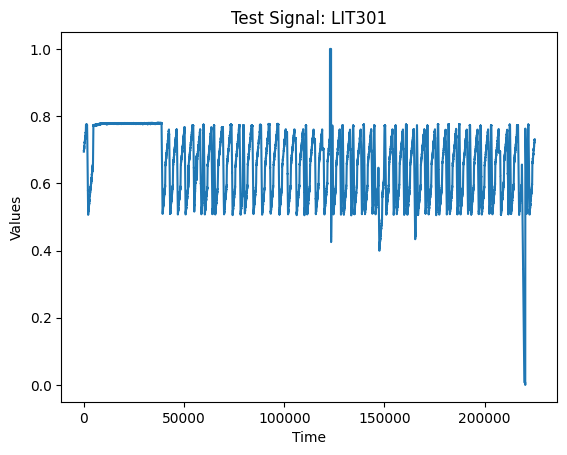

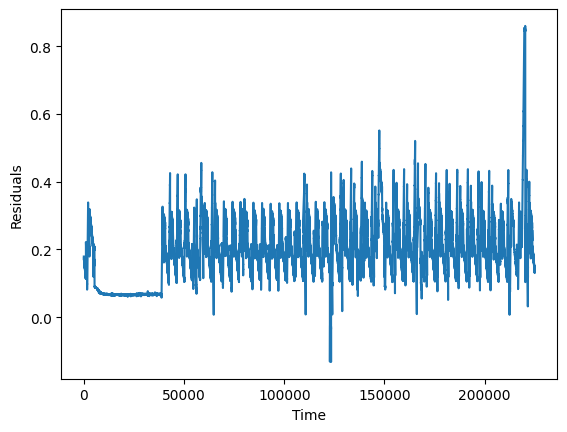

the number of abnormalies when using 4 components is 1015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224960 entries, 0 to 224959
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Id      224960 non-null  int64
 1   Label   224960 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 2.6 MB
None


In [42]:
# test data and get results
test_data = pd.read_csv("test_data.csv")
Id = test_data['Id']
test_data = test_data.drop(['Id','Timestamp'], axis = 1)


scaler = MinMaxScaler()
normalized_test = scaler.fit_transform(test_data)
normalized_test = pd.DataFrame(normalized_test, columns=test_data.columns)

plt.plot(range(len(normalized_test[signal])), normalized_test[signal].values)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("Test Signal: {}".format(signal))
plt.show()

# PCA
df_pca = pd.DataFrame(pca.transform(normalized_test), index=normalized_test.index)
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index, columns=normalized_test.columns)


residuals = df_restored[signal] - normalized_test[signal]
plt.plot(range(len(residuals)), residuals.values)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

count = len(residuals[abs(residuals) > threshold])
print("the number of abnormalies when using {} components is {}".format(num,count))


residuals[abs(residuals) > threshold] = 1
residuals[abs(residuals) <= threshold] = 0

 
results = pd.DataFrame({'Id': Id, 'Label':residuals})
results['Label'] = results['Label'].astype(int)
print(results.info())
# results.to_csv("result27.csv", index = False)

### 3b. Analysis and answers to the questions

I choose the difference between reconstructed data point and original ones to calculate the residuals. We can see from the plot and the count of anormalies that generally the number of abnormalites deceares when the number of components increases, which is quite reasonable because the more principal components you use, the closer the reconstruction will be to the source. There is an exception for 4, the highest number of  anormalities are close to zero. This also could be explained by the results of "pca.explained_variance_ratio_" that most data can be explained by the first 4 compontents. Also, at the begining of the time, there are large abnormalities for almost all the numbers, which can be explained by the fact that at the very beginning of stage P3, UF Feed Tank is not stable, it might take time to reach a steady status.

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

First plot how the signal changes over time after normalization

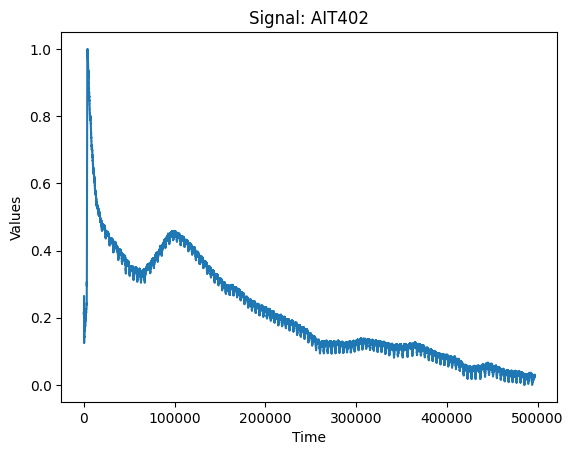

In [16]:
signal = "AIT402"
# signal = "LIT301"
series = normalized_train[signal]
plt.plot(range(len(series)), series.values)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("Signal: {}".format(signal))

plt.show()

Check if it's stationary, because ACF and PACF assume the data is already stationary.

In [17]:
slice_index = 25000

def test_stationarity(ts_data, signif=0.05):
    adf_test = adfuller(ts_data.loc[:slice_index], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        print("Stationary")
    else:
        print("Non-Stationary")

In [18]:
test_stationarity(series)

Non-Stationary


In [19]:
def differencing(data, order):
    differenced_data = data.diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
differenced_series = differencing(series, 1)
test_stationarity(differenced_series)

Stationary


Then, plot the ACF and PACF

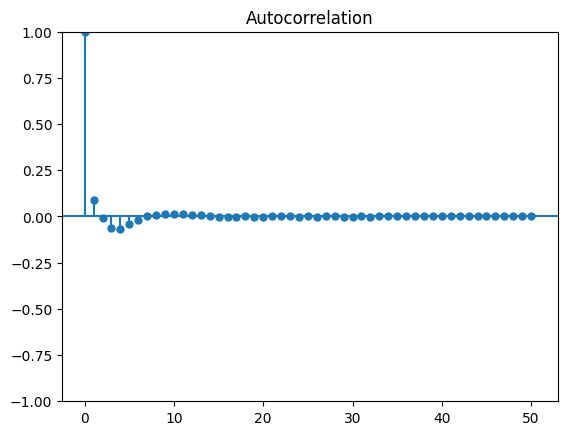

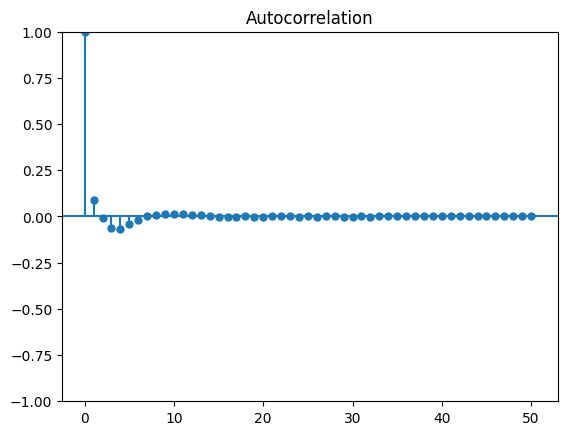

In [20]:
plot_acf(differenced_series, lags = 50) 

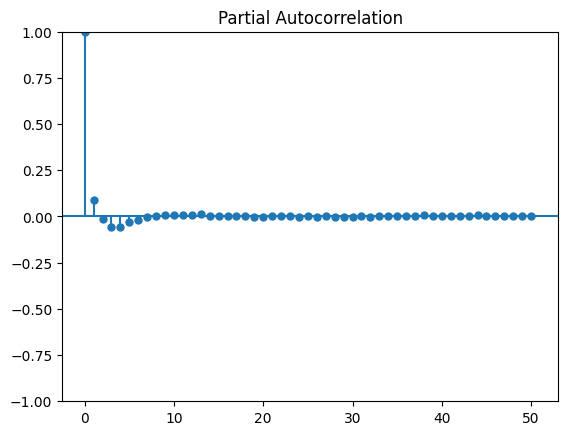

[ 1.00000000e+00  9.99994741e-01 -1.02368843e-01  1.73708098e-02
  6.63675040e-02  6.27347012e-02  3.17318836e-02  1.85556692e-02
  4.37805088e-03 -1.00697913e-04 -6.50074685e-03 -1.13658420e-02
 -1.03582279e-02 -8.59769082e-03 -1.29750986e-02 -2.98659481e-03
 -3.20072854e-03 -2.28012316e-03 -1.93457592e-03 -2.34798054e-03
  3.77443959e-04  7.54270103e-04 -2.79338660e-04 -1.27678304e-03
 -9.98685452e-04  8.29335440e-04 -6.38694775e-04  2.26798468e-03
 -1.26477835e-03  1.12178224e-04  3.15660650e-03  9.18506710e-04
 -1.91875285e-03  2.62225511e-03 -1.07028852e-03 -3.31807613e-03
 -1.69406802e-03 -5.52516217e-03 -2.12633664e-03 -3.47729702e-03
 -4.06744898e-03 -5.76868196e-03 -8.47723874e-03 -4.14473130e-03
 -3.98117384e-03 -7.04667234e-03 -3.07209492e-03 -2.56678193e-03
 -5.04225227e-03 -2.46526495e-03 -2.75402142e-03 -3.76317185e-03
 -5.04773217e-03 -1.22973066e-03  1.34670678e-03 -1.77768591e-03
 -6.90367202e-03]


In [21]:
plot_pacf(differenced_series, lags=50)
plt.show()

print(pacf(series))

Use the grid search to find the best parameters and compare the results with/without differencing 

In [24]:
# without differencing
# Load the time series data

# Calculate the index for splitting the data
split_index = int(250000 * 0.66)

# Split the data into training and testing sets
train_data = normalized_train.iloc[:split_index][signal]
test_data = normalized_train.iloc[split_index:250000][signal]

# Reset the index of the training and testing data in case of warning
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Define the parameter grid
p_values = range(1, 5)
q_values = range(1, 5)

# Initialize variables to store best parameters and best MSE
best_mse = np.inf
best_params = None

# Perform grid search
for p in p_values:
    for q in q_values:
            # Fit the ARMA model on the training data
            model = ARIMA(train_data, order=(p, 0, q)).fit()

            # Make predictions on the testing data
            predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

            # Evaluate the model using MSE
            mse = mean_squared_error(test_data, predictions)

            # Check if this is the best model so far
            if mse < best_mse:
                best_mse = mse
                best_params = (p, q)

# Print the best parameters
print("Best parameters (p, q) without differencing:", best_params)
print("Best MSE without differencing:", best_mse)


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warning

KeyboardInterrupt: 

In [22]:
# with differencing

# Split the data into training and testing sets
train_data = differenced_series.iloc[:split_index]
test_data = differenced_series.iloc[split_index:250000]

# Reset the index of the training and testing data in case of warning
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Perform grid search
for p in p_values:
    for q in q_values:
            # Fit the ARMA model on the training data
            model = ARIMA(train_data, order=(p, 0, q)).fit()

            # Make predictions on the testing data
            predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

            # Evaluate the model using MSE
            mse = mean_squared_error(test_data, predictions)

            # Check if this is the best model so far
            if mse < best_mse:
                best_mse = mse
                best_params = (p, q)

# Print the best parameters
print("Best parameters (p, q) with differencing:", best_params)
print("Best MSE withdifferencing:", best_mse)

NameError: name 'split_index' is not defined

### 4b. Plots to study the detected anomalies

Plot the residuals

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 LIT301   No. Observations:               496800
Model:                          ARIMA   Log Likelihood             2513305.772
Date:                Fri, 02 Jun 2023   AIC                       -5026607.544
Time:                        23:14:16   BIC                       -5026585.312
Sample:                             0   HQIC                      -5026601.249
                             - 496800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.564e-06   2.17e-06     -1.644      0.100   -7.81e-06    6.86e-07
sigma2      2.348e-06   1.41e-11   1.67e+05      0.000    2.35e-06    2.35e-06
Ljung-Box (L1) (Q):                  99.20   Jarque-

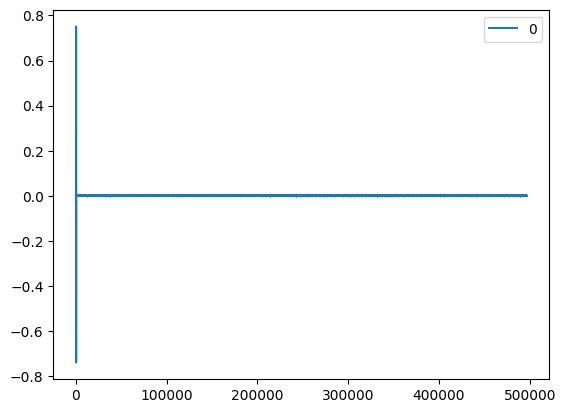

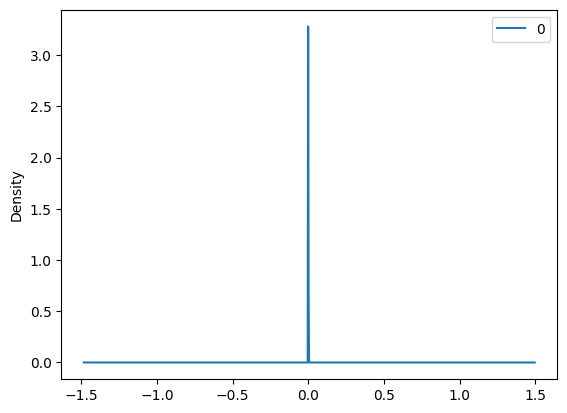

                   0
count  496800.000000
mean        0.000005
std         0.001537
min        -0.738955
25%        -0.000223
50%         0.000004
75%         0.000231
max         0.751043


In [80]:
model_fit = ARIMA(differenced_series, order=(3, 0, 2)).fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

0.2877589678651157
the number of abnormalies is 838
F1 score: 0.11132805566402784


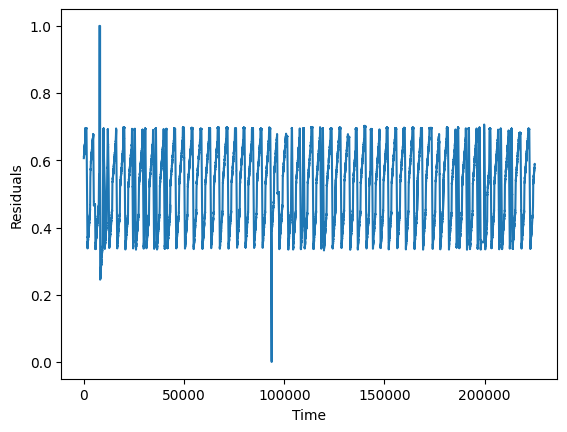

In [76]:
# validate
val_data = pd.read_csv("val_data.csv")
labels = val_data['Label'][1:]
val_data = val_data.drop(['Label','Id','Timestamp'], axis = 1)


scaler = MinMaxScaler()
normalized_val = scaler.fit_transform(val_data)
normalized_val = pd.DataFrame(normalized_val, columns=val_data.columns)

history = normalized_val[signal][:-1]
real = normalized_val[signal][1:]

# Make predictions on the validation data
predictions = model.predict(start=0, end=len(val_data)-1)

# Evaluate the model using MSE
mse = mean_squared_error(real, predictions)
print(mse)

residuals = real - predictions

plt.plot(range(len(residuals)), residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')

threshold = 0.7
count = len(residuals[abs(residuals) > threshold])
print("the number of predicted abnormalies is {}".format(count))
print("the number of actual abnormalies is {}".format(len(labels[abels==1])))

residuals[abs(residuals) > threshold ] = 1
residuals[abs(residuals) <= threshold ] = 0



# Calculate the F1 score. accuracy and recall 
f1 = f1_score(labels, residuals)
accuracy = accuracy_score(labels, residuals)
recall = recall_score(labels, residuals)

# Print the accuracy and recall scores
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 score:", f1)


0.44489614309425773
the number of abnormalies is 95993


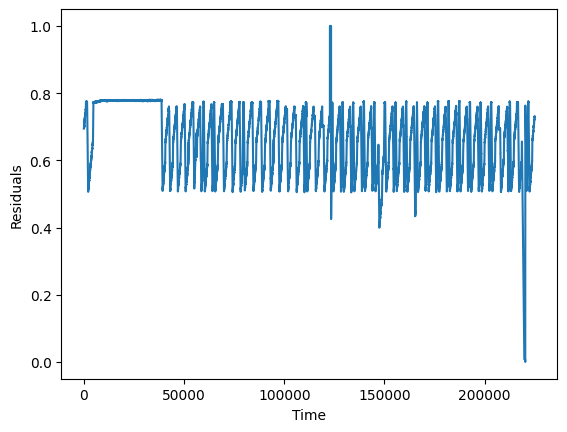

In [77]:
# test and get results
test_data = pd.read_csv("test_data.csv")
Id = test_data['Id']
test_data = test_data.drop(['Id','Timestamp'], axis = 1)

scaler = MinMaxScaler()
normalized_test = scaler.fit_transform(test_data)
normalized_test = pd.DataFrame(normalized_test, columns=test_data.columns)

history = normalized_test[signal][:-1]
real = normalized_test[signal][1:]

# Make predictions on the validation data
predictions = model.predict(start=0, end=len(history))

# Evaluate the model using MSE
mse = mean_squared_error(real, predictions)
print(mse)

residuals = real-predictions

plt.plot(range(len(residuals)), residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')

count = len(residuals[abs(residuals) > threshold])
print("the number of predicted abnormalies is {}".format(count))
print("the number of actual abnormalies is {}".format(len(labels[abels==1])))


residuals[abs(residuals) > threshold] = 1
residuals[abs(residuals) <= threshold] = 0

In [79]:
results = pd.DataFrame({'Id': Id, 'Label':residuals})
results.to_csv("result1.csv", index = False)

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.